In [95]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
company=[]
rating=[]
pub_pri=[]
years=[]
Reviews=[]
Salaries=[]
Interviews=[]
Jobs=[]
for j in range(1,20):
    url=f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&showPhotosModal=true&page={j}"# URL for multiple pages
 
    r=requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
    soup=BeautifulSoup(r.text)
    for i in soup.find_all('div',{'class':'ab-company-result-card'}):
        name=i.find('h2',{'class':'company-name bold-title-l'})
        stars=i.find('div',{'class':'rating-wrapper'})
        year=i.find('div',{'class':'company-basic-info'})
        review=i.find('ul',{'class':'company-action-center'})
        regex=re.findall(r'[A-z]+',name.text)      # Applying Regex for company name
        regex1=re.findall(r'[0-9\.0-9]+',stars.text)  #Applying Regex for company star rating
        regex2=re.findall(r'[A-z]+',year.text)   #Applying Regex for company public\private
        regex3=re.findall(r'(\d+)\sy',year.text)  #Applying Regex for company years
        regex4=re.findall(r'[0-9]+',review.text)  #Applying Regex for company Reviews
        regex5=re.findall(r'Salaries\s+(\d+)',review.text)  #Applying Regex for company salaries
        regex6=re.findall(r'Interviews\s+(\d+)',review.text)  #Applying Regex for company Interviews
        regex7=re.findall(r'Jobs\s+(\d+)',review.text) #Applying Regex for company Jobs
        if regex :
            company.append(regex[0])  #Appending company name to company
        else:
            company.append(np.nan)
        if regex1 :
            rating.append(regex1[0])  #Appending company star rating to rating
        else:
            rating.append(np.nan)
        if regex2 :
            pub_pri.append(regex2[0])  #Appending company public\private to pub_pri
        else:
            pub_pri.append(np.nan)
        if regex3 :
            years.append(regex3[0])  #Appending company years to years
        else:
            years.append(np.nan)
        if regex4 :
            Reviews.append(regex4[0])  #Appending company Reviews to Reviews
        else:
            Reviews.append(np.nan)
        if regex5 :
            Salaries.append(regex5[0])  #Appending company salaries to Salaries
        else:
            Salaries.append(np.nan)
        if regex6 :
            Interviews.append(regex6[0])  #Appending company interviews to Interviews
        else:
            Interviews.append(np.nan)
        if regex7 :
            Jobs.append(regex7[0]) #Appending company jobs to Jobs
        else:
            Jobs.append(np.nan)        

In [97]:
print(len(company))
print(len(rating))
print(len(years))
print(len(pub_pri))
print(len(Reviews))
print(len(Salaries))
print(len(Interviews))
print(len(Jobs))

570
570
570
570
570
570
570
570


In [98]:
IT=pd.DataFrame({'company_name':company
                 ,'stars':rating,'pub_pri':pub_pri,'years':years,'Reviews':Reviews,'Salaries':Salaries
                 ,'Interviews':Interviews,'Jobs':Jobs
                })                                        # creating DataFrame using pandas


In [99]:
IT.tail(30)  # last 30 values

,company_name,stars,pub_pri,years,Reviews,Salaries,Interviews,Jobs
540,Varroc,3.7,Public,35,947,5,50,4
541,Swaraj,4.3,Mumbai,61,946,3,30,NaN
542,Panasonic,4.1,Private,105,945,5,34,NaN
543,HCL,3.6,Private,23,945,5,48,NaN
544,Intouch,3.2,Private,22,945,4,76,145
545,KFC,4.2,Private,71,941,2,25,NaN
546,Narayana,3.7,Private,38,935,4,30,6
547,WABCO,4.0,Public,54,934,4,16,NaN
548,Nayara,4.3,Private,34,934,4,41,12
549,L,3.8,Public,86,932,4,28,NaN


In [100]:
IT["pub_pri"]=IT["pub_pri"].replace("Partnership","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Bangalore","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Mumbai","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Government","Private")
IT["pub_pri"]=IT["pub_pri"].replace("LLP","Private")
IT["pub_pri"]=IT["pub_pri"].replace("JV","Private")
IT["pub_pri"]=IT["pub_pri"].replace("New","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Chennai","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Columbus","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Canonsburg","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Gurgaon","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Bengaluru","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Noida","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Pune","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Becharaji","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Baddi","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Hyderabad","Private")
IT["pub_pri"]=IT["pub_pri"].replace("Greater","Private")


In [101]:
IT["pub_pri"].value_counts()

Private    335
Public     235
Name: pub_pri, dtype: int64

In [102]:
IT.isnull().sum() # Finding null values

company_name     0
stars            0
pub_pri          0
years           10
Reviews          0
Salaries         0
Interviews       0
Jobs            67
dtype: int64

In [103]:
IT["Jobs"] = pd.to_numeric(IT["Jobs"], errors='coerce')

# calculate the mean of 'Jobs' column
print(IT["Jobs"].mean())

100.3976143141153


In [104]:
IT["years"] = pd.to_numeric(IT["years"], errors='coerce')

# calculate the mean of 'Jobs' column
print(IT["years"].mean())

46.28214285714286


In [105]:
IT["Jobs"]=IT["Jobs"].fillna(100)
IT["years"]=IT["years"].fillna(46)

In [106]:
IT.isnull().sum()

company_name    0
stars           0
pub_pri         0
years           0
Reviews         0
Salaries        0
Interviews      0
Jobs            0
dtype: int64

In [107]:
IT.info() # Finding information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  570 non-null    object 
 1   stars         570 non-null    object 
 2   pub_pri       570 non-null    object 
 3   years         570 non-null    float64
 4   Reviews       570 non-null    object 
 5   Salaries      570 non-null    object 
 6   Interviews    570 non-null    object 
 7   Jobs          570 non-null    float64
dtypes: float64(2), object(6)
memory usage: 35.8+ KB


In [108]:
IT["Jobs"] = IT["Jobs"].astype(int)   #converting object to respected datatype
IT["stars"] = IT["stars"].astype(float)
IT["years"] = IT["years"].astype(int)
IT["Reviews"] = IT["Reviews"].astype(int)
IT["Salaries"] = IT["Salaries"].astype(int)
IT["Interviews"] = IT["Interviews"].astype(int)


In [109]:
IT.info() # converted information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  570 non-null    object 
 1   stars         570 non-null    float64
 2   pub_pri       570 non-null    object 
 3   years         570 non-null    int32  
 4   Reviews       570 non-null    int32  
 5   Salaries      570 non-null    int32  
 6   Interviews    570 non-null    int32  
 7   Jobs          570 non-null    int32  
dtypes: float64(1), int32(5), object(2)
memory usage: 24.6+ KB


In [110]:
IT.tail(30)

,company_name,stars,pub_pri,years,Reviews,Salaries,Interviews,Jobs
540,Varroc,3.7,Public,35,947,5,50,4
541,Swaraj,4.3,Private,61,946,3,30,100
542,Panasonic,4.1,Private,105,945,5,34,100
543,HCL,3.6,Private,23,945,5,48,100
544,Intouch,3.2,Private,22,945,4,76,145
545,KFC,4.2,Private,71,941,2,25,100
546,Narayana,3.7,Private,38,935,4,30,6
547,WABCO,4.0,Public,54,934,4,16,100
548,Nayara,4.3,Private,34,934,4,41,12
549,L,3.8,Public,86,932,4,28,100


In [111]:
IT.to_csv('ambitionbox_IT.csv')  # save the data in csv formate 

In [112]:
a=pd.read_csv('ambitionbox_IT.csv') # Reading the data

In [113]:
a.head()

,Unnamed: 0,company_name,stars,pub_pri,years,Reviews,Salaries,Interviews,Jobs
0,0,TCS,3.9,Public,55,53,346,4,270
1,1,Accenture,4.1,Public,34,34,224,3,5
2,2,Cognizant,3.9,Private,29,31,205,2,531
3,3,ICICI,4.1,Public,29,25,80,1,178
4,4,HDFC,4.0,Public,29,25,84,1,175


In [114]:
b=a[a.Salaries>150]  # reviews greaterthen 990
bm

,Unnamed: 0,company_name,stars,pub_pri,years,Reviews,Salaries,Interviews,Jobs
0,0,TCS,3.9,Public,55,53,346,4,270
1,1,Accenture,4.1,Public,34,34,224,3,5
2,2,Cognizant,3.9,Private,29,31,205,2,531
5,5,Wipro,3.9,Public,78,24,176,2,568
6,6,Infosys,3.9,Public,42,23,172,4,1
327,327,Taurus,4.7,Private,8,1,508,11,1
347,347,Exotic,4.6,Private,3,1,360,40,11


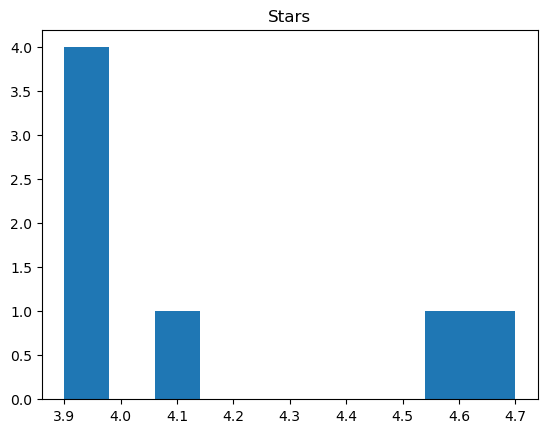

In [115]:
# Histogram for univarient
plt.hist(b['stars'])
plt.title("Stars")
plt.show()

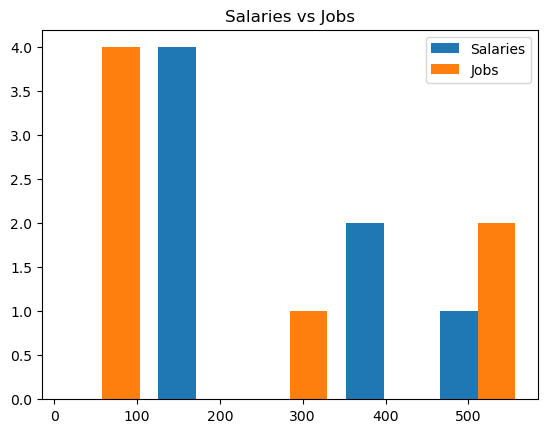

In [116]:
# Histogram for Bivarient
plt.hist([b['Salaries'], b['Jobs']], bins=5, label=['Salaries', 'Jobs'])
plt.legend()
plt.title("Salaries vs Jobs")
plt.show()

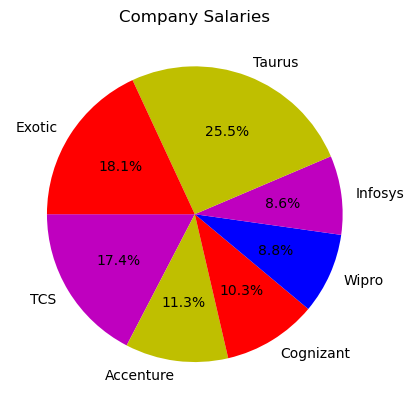

In [128]:
# pie chart
slices =b['Salaries']
company =b['company_name']
plt.pie(slices, labels=company, colors=['m','y','r','b'], startangle=180, autopct="%1.1f%%")
plt.title("Company Salaries")
plt.show()

Text(0.5, 1.0, 'Salaries vs Jobs')

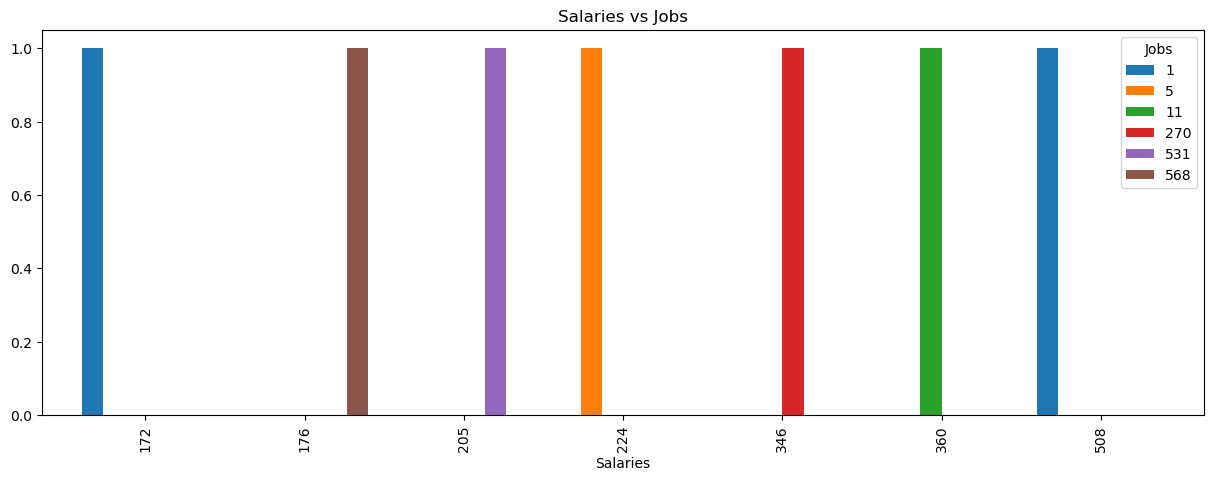

In [118]:
# Bar graph
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(b["Salaries"],b["Jobs"]).plot(kind="bar",ax=ax,width=0.8)
plt.title("Salaries vs Jobs")

<AxesSubplot:>

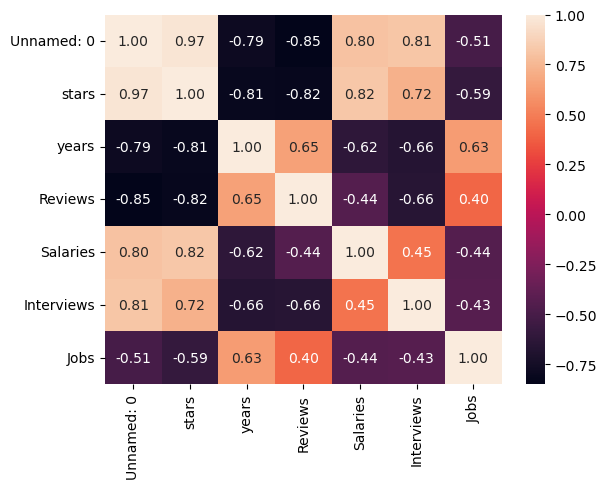

In [119]:
# HeatMap
b.corr()
sns.heatmap(b.corr(),annot=True,fmt=".2f")


In [120]:
# scatter plot
colors_p = ['red','green','blue','pink','black','pink','brown']
colors_ps = [np.random.choice(colors_p) for i in range(7)]

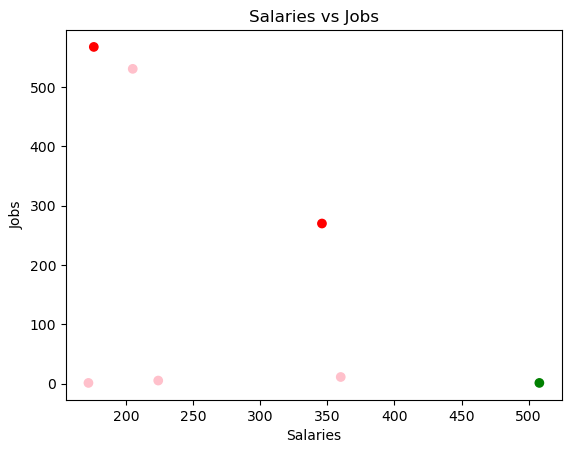

In [121]:
plt.scatter(b['Salaries'],b['Jobs'], color=colors_ps)
plt.title("Salaries vs Jobs")
plt.xlabel("Salaries")
plt.ylabel("Jobs")
plt.show()

<AxesSubplot:xlabel='pub_pri', ylabel='Jobs'>

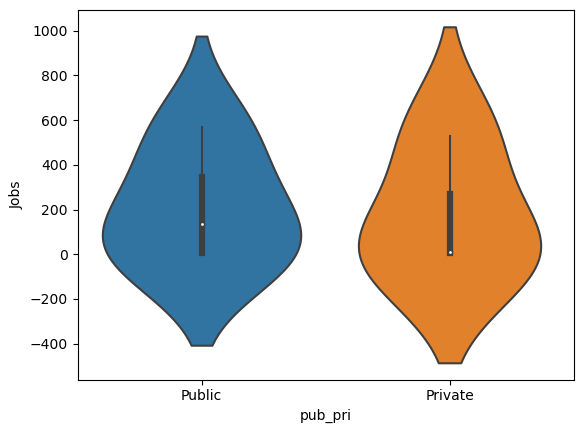

In [122]:
# violinplot
sns.violinplot(x=b["pub_pri"], y=b["Jobs"])

<AxesSubplot:xlabel='years', ylabel='Density'>

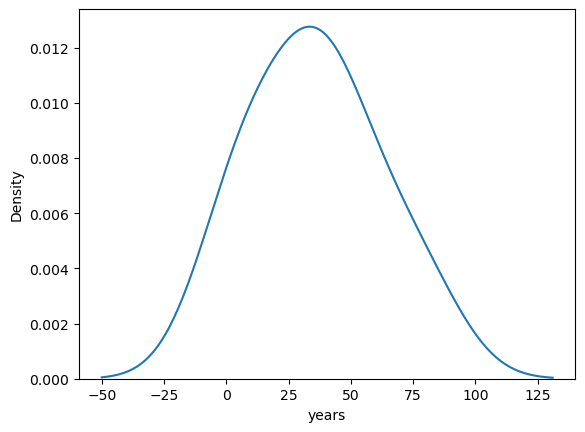

In [123]:
# Density plot
sns.kdeplot(b['years'])

<AxesSubplot:xlabel='pub_pri', ylabel='years'>

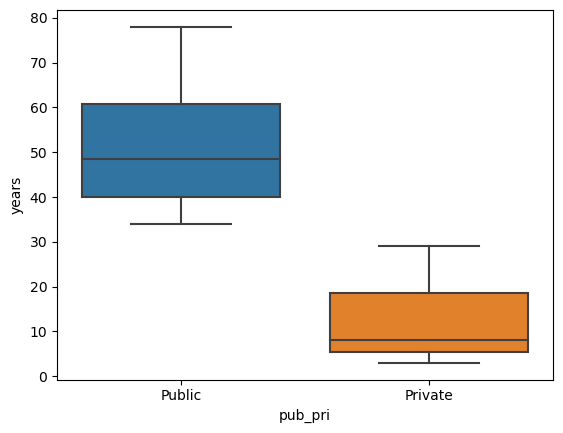

In [124]:
sns.boxplot( x=b["pub_pri"], y=b["years"] )

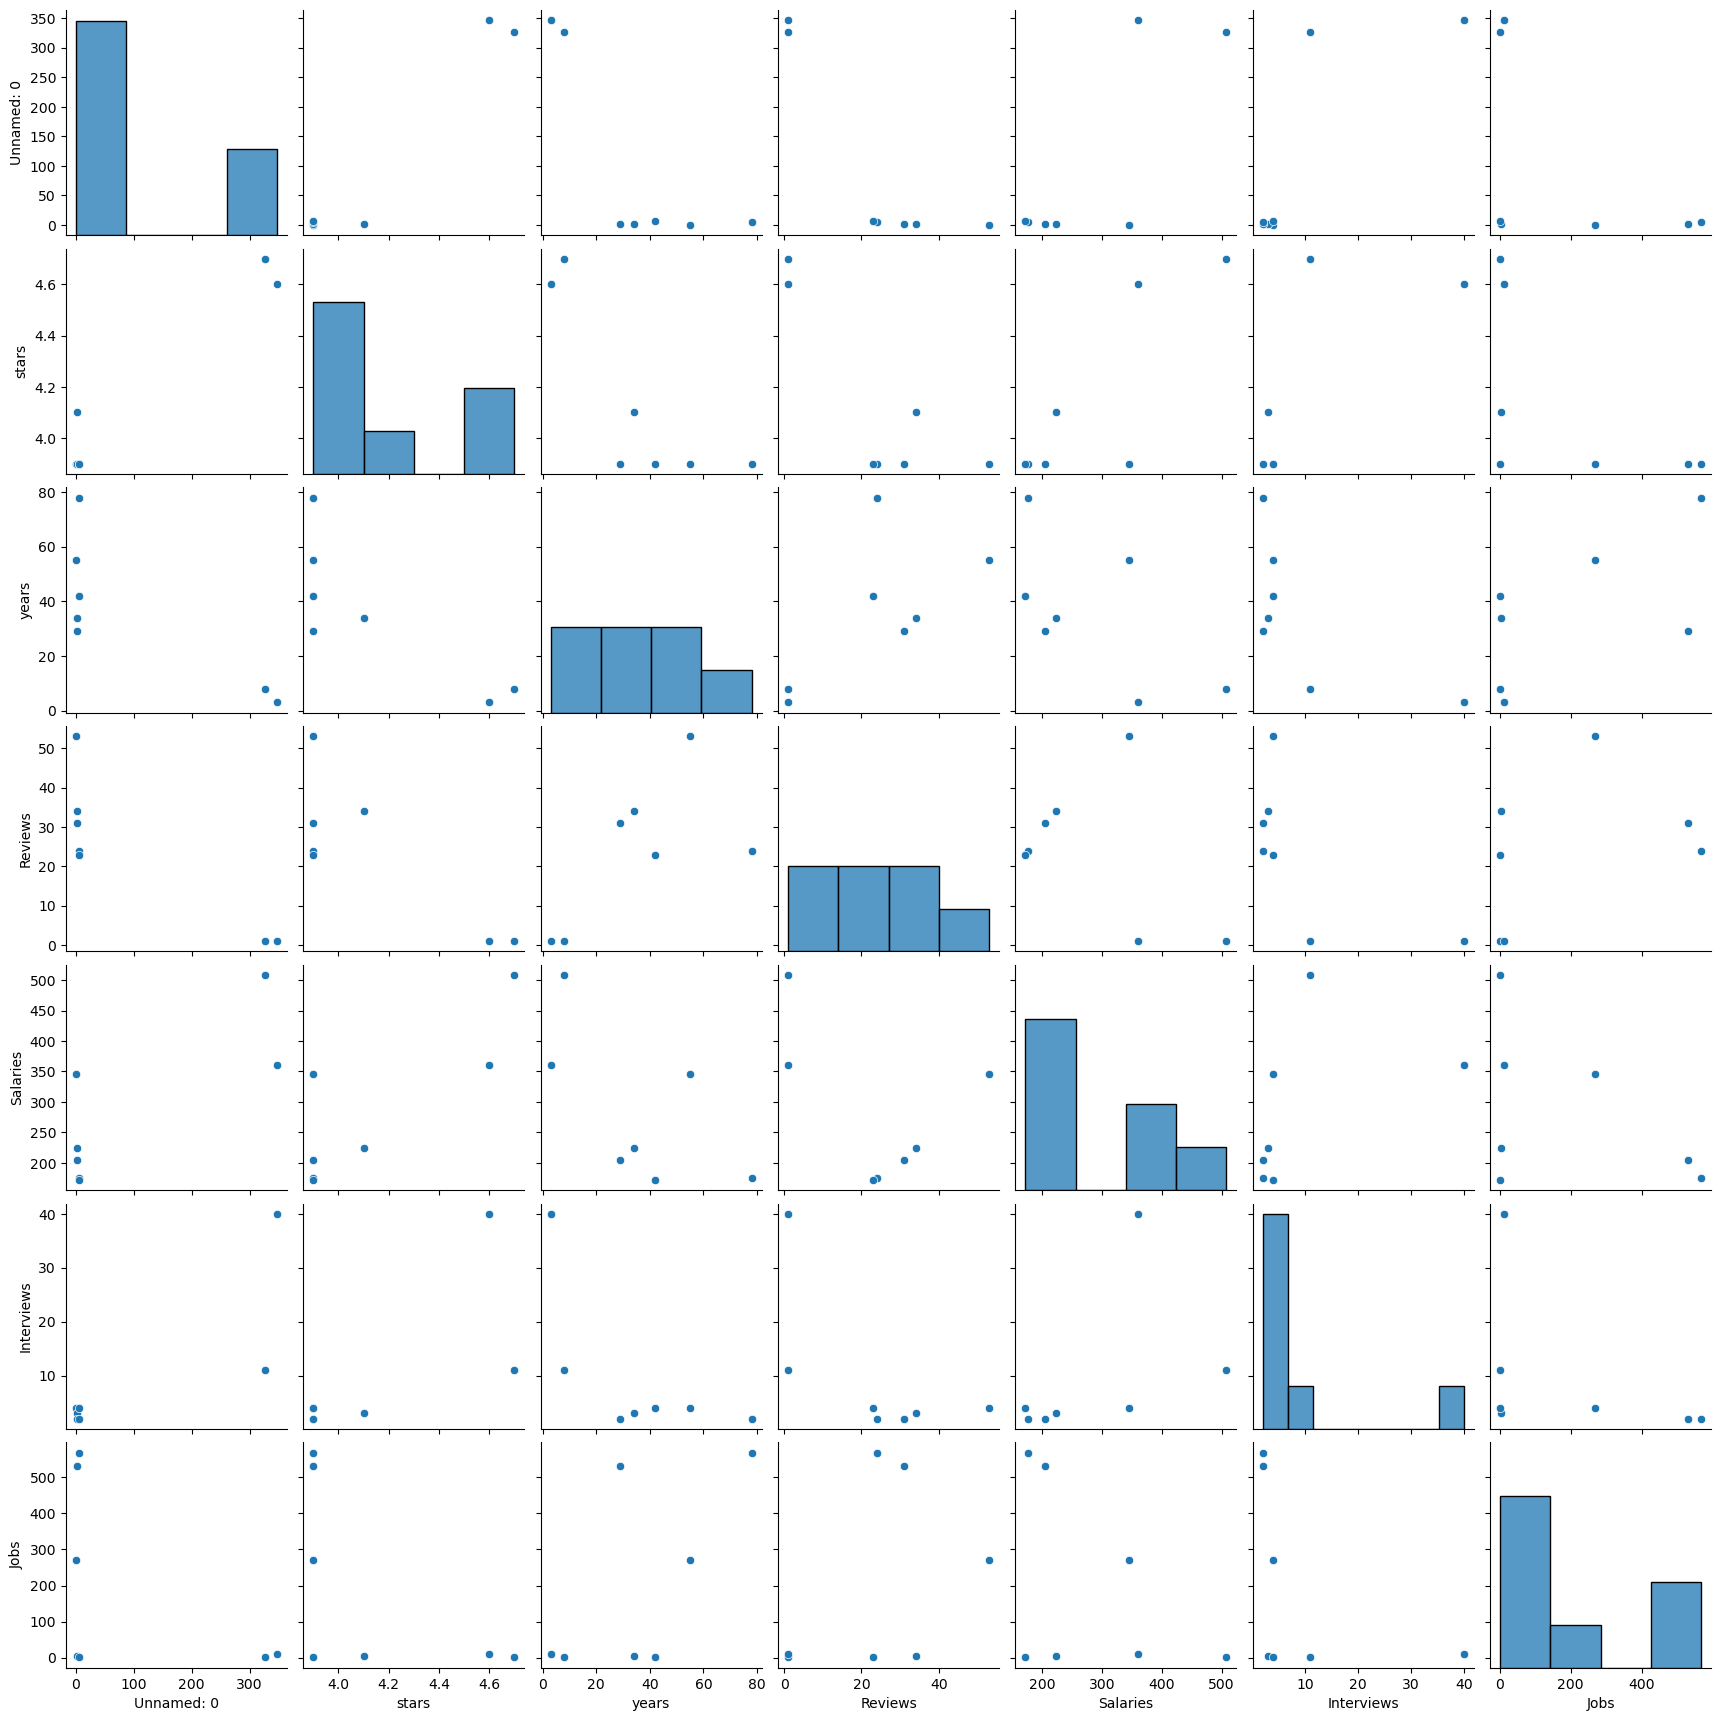

In [125]:
sns.pairplot(b)

C:\Users\basva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_pri', ylabel='count'>

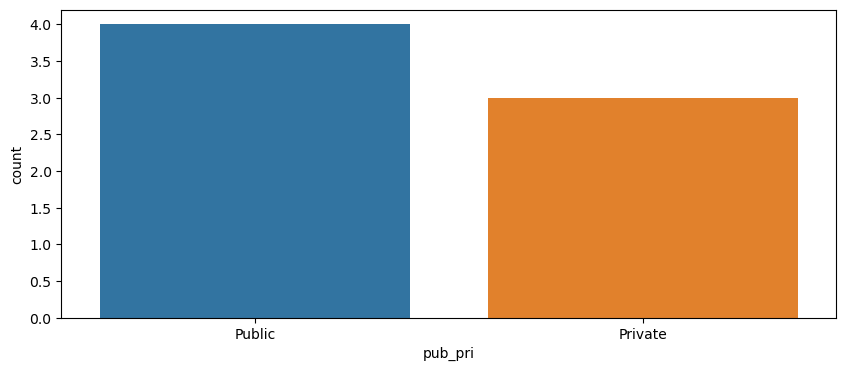

In [126]:
plt.figure(figsize=(10,4))
sns.countplot(b.pub_pri)

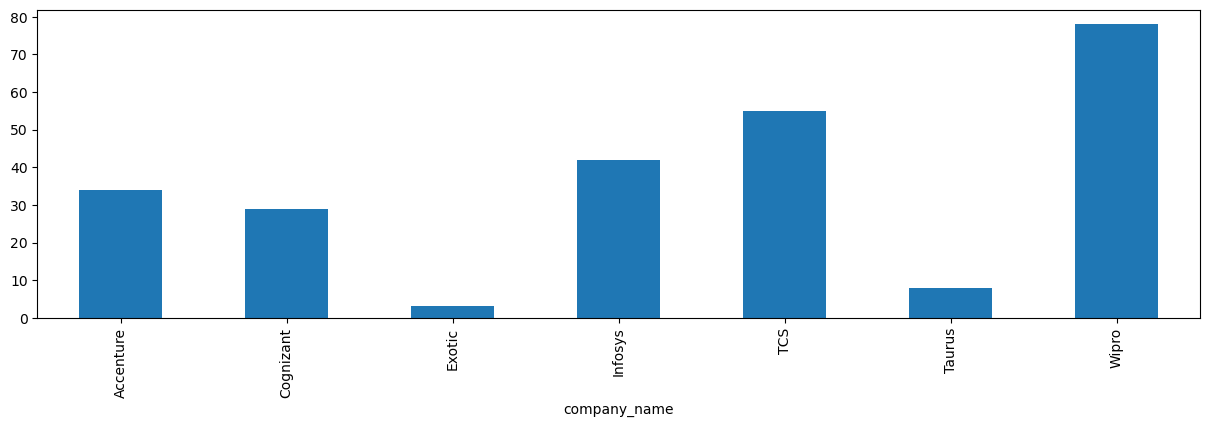

In [129]:
plt.figure(dpi = 100, figsize=(15,4))
b.groupby(['company_name'])['years'].min().plot(kind = 'bar');